In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.utils.np_utils import to_categorical
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data_path = '/content/drive/MyDrive/CNN Practice Datasets/Food Classification/Training dataset'

In [ ]:
train_data = []
for folder in os.listdir(data_path):
  sub_path = data_path+'/'+folder
  for img_path in os.listdir(sub_path):
    img = sub_path+"/"+img_path
    img_arr = cv2.imread(img)
    img_arr = cv2.resize(img_arr,(128,128))
    train_data.append(img_arr)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(data_path,target_size=(128,128),class_mode='sparse',batch_size=32)

Found 495 images belonging to 10 classes.


In [ ]:
# 495/32 = approx 16 [0-15] (32 batches of 128,128,3)
train_gen[15] # 4-dim 32,128,128,3

(array([[[[0.9921569 , 0.9176471 , 0.64705884],
          [1.        , 0.9215687 , 0.91372555],
          [0.9607844 , 0.8745099 , 0.6901961 ],
          ...,
          [0.36078432, 0.27058825, 0.30980393],
          [0.23137257, 0.18431373, 0.19215688],
          [0.10980393, 0.07450981, 0.05490196]],
 
         [[0.9450981 , 0.89019614, 0.7372549 ],
          [0.9686275 , 0.9450981 , 0.8117648 ],
          [0.9803922 , 0.9686275 , 0.8000001 ],
          ...,
          [0.2901961 , 0.21568629, 0.19215688],
          [0.2392157 , 0.19607845, 0.18823531],
          [0.13333334, 0.10196079, 0.09411766]],
 
         [[0.94117653, 0.8980393 , 0.5882353 ],
          [0.9450981 , 0.8980393 , 0.8352942 ],
          [0.91372555, 0.9490197 , 0.6862745 ],
          ...,
          [0.20392159, 0.14117648, 0.0509804 ],
          [0.24313727, 0.20784315, 0.18823531],
          [0.3019608 , 0.2784314 , 0.29411766]],
 
         ...,
 
         [[0.40000004, 0.3529412 , 0.2509804 ],
          [0.37647

In [ ]:
target = train_gen.classes
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [ ]:
train_data = np.array(train_data)
train_data

array([[[[131, 122, 125],
         [138, 129, 132],
         [127, 118, 121],
         ...,
         [195, 199, 224],
         [195, 194, 217],
         [205, 200, 224]],

        [[134, 125, 128],
         [126, 117, 120],
         [134, 125, 128],
         ...,
         [178, 183, 220],
         [183, 186, 219],
         [190, 188, 220]],

        [[134, 125, 128],
         [130, 121, 124],
         [140, 131, 134],
         ...,
         [138, 147, 194],
         [173, 183, 225],
         [151, 160, 197]],

        ...,

        [[105,  98, 101],
         [ 87,  80,  84],
         [124, 117, 120],
         ...,
         [189, 178, 181],
         [173, 162, 165],
         [189, 178, 181]],

        [[ 80,  73,  76],
         [ 99,  92,  94],
         [ 99,  92,  95],
         ...,
         [188, 177, 180],
         [187, 176, 179],
         [181, 170, 173]],

        [[128, 121, 124],
         [118, 110, 113],
         [107, 100, 103],
         ...,
         [175, 164, 167],
        

In [ ]:
print("Max of training data:",train_data.max())
print("Min of training data:",train_data.min())

Max of training data: 255
Min of training data: 0


In [ ]:
train_data = train_data/255
print("Max of training data:",train_data.max())
print("Min of training data:",train_data.min())

Max of training data: 1.0
Min of training data: 0.0


In [ ]:
target_cat = to_categorical(target,num_classes=10)
target_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(train_data,target_cat,test_size=0.2,random_state=10)

In [25]:
print("Input data:")
print(type(X_train))
print(X_train.shape)
print(type(X_val))
print(X_val.shape)
print("Target data:")
print(type(y_train))
print(y_train.shape)
print(type(y_val))
print(y_val.shape)

Input data:
<class 'numpy.ndarray'>
(396, 128, 128, 3)
<class 'numpy.ndarray'>
(99, 128, 128, 3)
Target data:
<class 'numpy.ndarray'>
(396, 10)
<class 'numpy.ndarray'>
(99, 10)


In [26]:
model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 115200)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [28]:
hist = model.fit(train_data,target_cat,verbose=1,epochs=10) #batch size = 16

Epoch 1/10
16/16 [==============================] - 71s 4s/step - loss: 8.4588 - accuracy: 0.1030
Epoch 2/10
16/16 [==============================] - 51s 3s/step - loss: 2.3500 - accuracy: 0.1919
Epoch 3/10
16/16 [==============================] - 50s 3s/step - loss: 2.2722 - accuracy: 0.2121
Epoch 4/10
16/16 [==============================] - 49s 3s/step - loss: 1.9484 - accuracy: 0.3394
Epoch 5/10
16/16 [==============================] - 50s 3s/step - loss: 1.6351 - accuracy: 0.4889
Epoch 6/10
16/16 [==============================] - 52s 3s/step - loss: 0.8894 - accuracy: 0.7374
Epoch 7/10
16/16 [==============================] - 49s 3s/step - loss: 0.4566 - accuracy: 0.8788
Epoch 8/10
16/16 [==============================] - 49s 3s/step - loss: 0.2201 - accuracy: 0.9434
Epoch 9/10
16/16 [==============================] - 49s 3s/step - loss: 0.9628 - accuracy: 0.8283
Epoch 10/10
16/16 [==============================] - 49s 3s/step - loss: 0.0718 - accuracy: 0.9879


In [29]:
model.evaluate(train_data,target_cat)

16/16 [==============================] - 13s 777ms/step - loss: 0.0315 - accuracy: 0.9960


[0.03151237964630127, 0.9959595799446106]

In [30]:
pred = model.predict(X_val)
pred = np.argmax(pred,axis=1)
pred

array([5, 7, 3, 6, 3, 6, 4, 4, 8, 6, 6, 9, 4, 8, 4, 8, 1, 1, 9, 8, 4, 9,
       9, 8, 8, 3, 4, 9, 3, 7, 5, 7, 6, 3, 2, 4, 3, 2, 5, 6, 2, 7, 2, 5,
       0, 2, 4, 1, 3, 9, 9, 8, 5, 4, 5, 2, 3, 0, 4, 2, 2, 1, 6, 6, 4, 9,
       9, 7, 4, 6, 8, 5, 1, 4, 0, 7, 6, 6, 4, 6, 3, 9, 1, 5, 6, 0, 6, 1,
       0, 1, 6, 8, 3, 4, 9, 1, 5, 0, 1])

In [31]:
y_val = np.argmax(y_val,axis=1)
y_val

array([5, 7, 3, 6, 3, 6, 4, 4, 8, 6, 6, 9, 4, 8, 4, 8, 1, 1, 9, 8, 4, 9,
       9, 8, 8, 3, 4, 9, 3, 7, 5, 7, 6, 3, 2, 4, 3, 2, 5, 6, 2, 7, 2, 5,
       0, 2, 4, 1, 3, 9, 9, 8, 5, 4, 5, 2, 3, 0, 4, 2, 2, 1, 6, 6, 4, 9,
       9, 7, 4, 6, 8, 5, 1, 4, 0, 7, 6, 6, 4, 7, 3, 9, 1, 5, 6, 0, 6, 1,
       0, 1, 6, 8, 3, 4, 9, 1, 5, 0, 1])

In [32]:
confusion_matrix(y_val,pred)

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,pred)

0.98989898989899

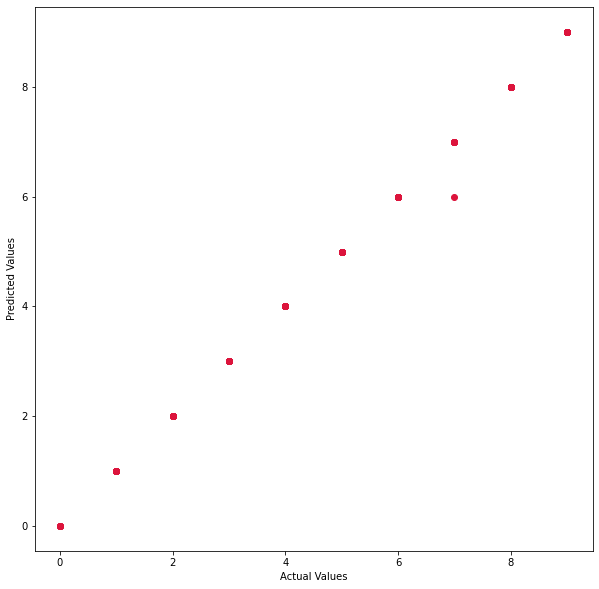

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_val,pred,c='crimson')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Text(0, 0.5, 'Predictions')

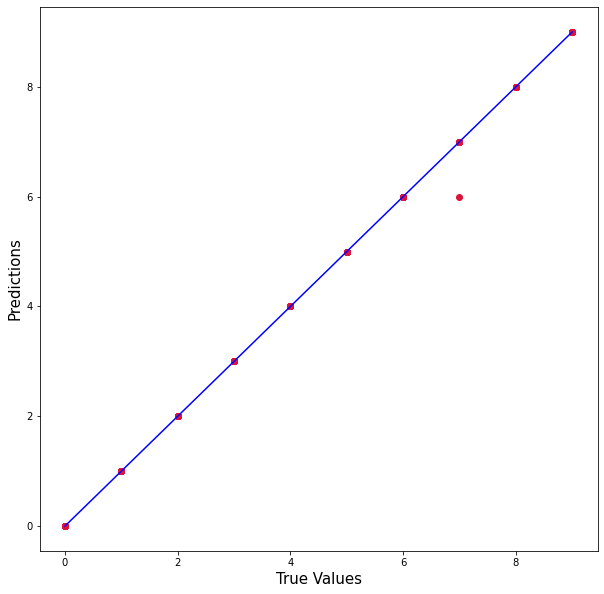

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, pred, c='crimson')
p1 = max(max(pred), max(y_val))
p2 = min(min(pred), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

In [ ]:
_